In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import os

### Three possible ways to do it:
1) provide a folder of images
2) provide a list of urls to pull
3) xxxx

In [16]:
# Option 1: provide a folder and iterate over all files
# This is most likely what you want to do if you've already run through the pipeline that creates the detection masks.
# ie. "pipeline_select_detect_mosaic"
base_dir = "D://projects_working_directories//202408_pano_images//images"
base_dir = "D://projects_working_directories//temp_images"
files = os.listdir(base_dir)
image_paths = [f"{base_dir}//{f}" for f in files[0:80]]

In [100]:
# Option 2: provide a file and iterate over urls
# In this option, images won't be saved
# expected input is a list of urls to the image (you can get this from the imge_url field in select * from sampled_images in the sqlite db
df_foo = pd.read_excel("c://temp//list_of_market.xlsx", sheet_name="Sheet3")
image_paths = df_foo.image_loc.tolist()

In [6]:
# Open the images
images = [Image.open(img_path) for img_path in image_paths]

# Resize all images to the same size (optional)
# Set the size for each image in the mosaic
img_width, img_height = 200, 200
resized_images = [img.resize((img_width, img_height)) for img in images]

# Create a blank canvas for the mosaic
mosaic_width = img_width * 2
mosaic_height = img_height * 2
mosaic_image = Image.new("RGB", (mosaic_width, mosaic_height))

# Paste the 4 images into the mosaic (2x2 grid)
mosaic_image.paste(resized_images[0], (0, 0))                      # Top-left
mosaic_image.paste(resized_images[1], (img_width, 0))               # Top-right
mosaic_image.paste(resized_images[2], (0, img_height))              # Bottom-left
mosaic_image.paste(resized_images[3], (img_width, img_height))      # Bottom-right

# Save the resulting mosaic
#mosaic_image.save("path/to/your/mosaic_image.jpg")

# Optionally show the mosaic
mosaic_image.show()

In [23]:
import math

def zz_create_mosaic(image_paths, rows, cols, img_width, img_height, output_path="mosaic_image.jpg"):
    """
    Creates a mosaic from a list of image paths.

    Parameters:
    - image_paths: list of strings representing paths to image files.
    - rows: number of images vertically (rows in the mosaic).
    - cols: number of images horizontally (columns in the mosaic).
    - img_width: desired width for each image in the mosaic.
    - img_height: desired height for each image in the mosaic.
    - output_path: path where the final mosaic will be saved.
    
    Returns:
    - The mosaic image.
    """
    
    # Ensure there are enough images for the grid (rows * cols)
    total_images = rows * cols
    if len(image_paths) < total_images:
        raise ValueError(f"Not enough images to fill the mosaic! You need at least {total_images} images.")
    
    # Open the images and resize them to the desired size
    images = [Image.open(img_path).resize((img_width, img_height)) for img_path in image_paths[:total_images]]

    # Create a blank canvas for the mosaic
    mosaic_width = img_width * cols
    mosaic_height = img_height * rows
    mosaic_image = Image.new("RGB", (mosaic_width, mosaic_height))

    # Paste images onto the canvas in a grid layout
    for i in range(rows):
        for j in range(cols):
            img = images[i * cols + j]
            x_offset = j * img_width
            y_offset = i * img_height
            mosaic_image.paste(img, (x_offset, y_offset))

    # Save the mosaic
    mosaic_image.save(output_path)

    # Optionally, show the mosaic
    mosaic_image.show()

    return mosaic_image

In [8]:
def create_mosaic(image_paths, rows, cols, img_width, img_height, output_path="mosaic_image.jpg"):
    """
    Creates a mosaic from a list of image paths with filenames overlaid.

    Parameters:
    - image_paths: list of strings representing paths to image files.
    - rows: number of images vertically (rows in the mosaic).
    - cols: number of images horizontally (columns in the mosaic).
    - img_width: desired width for each image in the mosaic.
    - img_height: desired height for each image in the mosaic.
    - output_path: path where the final mosaic will be saved.
    
    Returns:
    - The mosaic image.
    """
    
    # Ensure there are enough images for the grid (rows * cols)
    total_images = rows * cols
    if len(image_paths) < total_images:
        raise ValueError(f"Not enough images to fill the mosaic! You need at least {total_images} images.")
    
    # Font settings for the filename text overlay
    try:
        font = ImageFont.truetype("arial.ttf", 10)  # Adjust the font size or path to arial.ttf if necessary
    except IOError:
        font = ImageFont.load_default()  # Fallback if the font is not found

    # Create a blank canvas for the mosaic with space for the filename text
    text_height = 12  # Space for the filename
    mosaic_width = img_width * cols
    mosaic_height = (img_height + text_height) * rows
    #mosaic_height = (img_height + text_height) * rows
    mosaic_image = Image.new("RGB", (mosaic_width, mosaic_height), color="black")

    # Open and resize the images, then draw the filename
    for i in range(rows):
        for j in range(cols):
            img_index = i * cols + j
            img_path = image_paths[i * cols + j]
            img = Image.open(img_path).resize((img_width, img_height))

            # Extract the file name from the path
            filename = os.path.basename(img_path)

            # Create a drawing context
            draw = ImageDraw.Draw(img)

            # Calculate the bounding box for the text
            text_bbox = draw.textbbox((0, 0), filename, font=font)
            text_width = text_bbox[2] - text_bbox[0]  # Width of the text

            # Calculate text position to be centered
            text_position = ((img_width - text_width) // 2, img_height - 10)

            # Draw the filename on the image
            #draw.text(text_position, filename, fill="white", font=font)

            # Paste the image onto the mosaic canvas
            x_offset = j * img_width
            y_offset = i * (img_height + text_height)
            mosaic_image.paste(img, (x_offset, y_offset))

            # Create a new draw context for the mosaic
            mosaic_draw = ImageDraw.Draw(mosaic_image)

            # Overlay the filename below each image on the mosaic canvas
            mosaic_draw.text(
                (x_offset + (img_width - text_width) // 2, y_offset + img_height - 2),
                f"{filename} - {img_index}", fill="white", font=font
            )

    # Save the mosaic
    mosaic_image.save(output_path)

    # Optionally show the mosaic
    mosaic_image.show()

    return mosaic_image

In [14]:
x = Image.open(image_paths[0])
w = x.size[0]
h = x.size[1]

def step_down(w, h, amt=5):
    w = int(w / 5)
    h = int(h / 5)
    return w, h

w, h = step_down(w, h, 1)


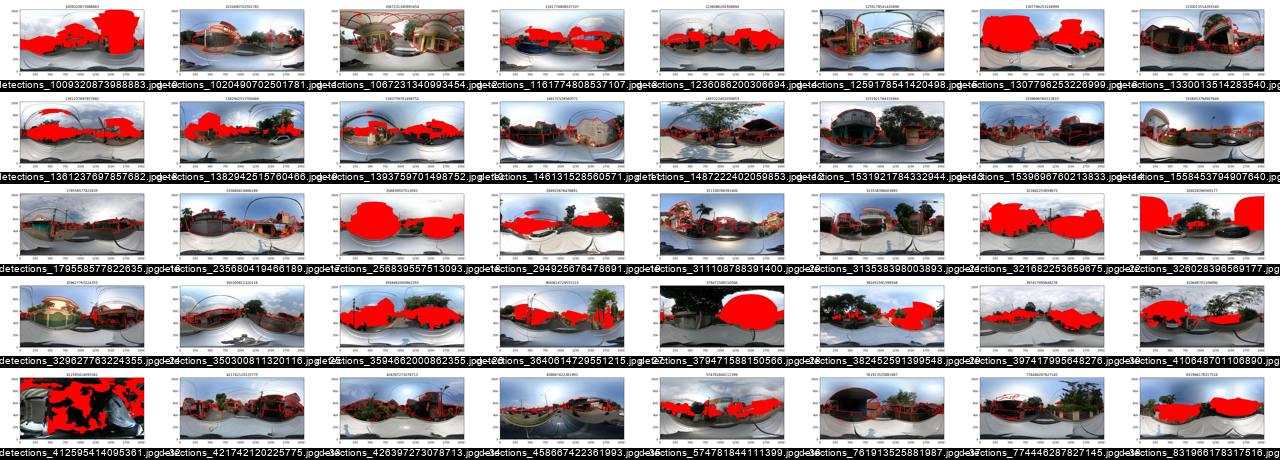

In [17]:
create_mosaic(image_paths, 5, 8, w, h)

In [111]:
image_paths[35]

'D://projects_working_directories//202408_pano_images//images//mapillary_1167219663849733_thumb_2048_url.jpg'